ME 535 Winter 2020

# Homework 3

### Due Tuesday Feb. 11

1a) Write your own python function to implement a $4^{th}$-order Runge-Kutta (RK4) solver for systems of ODEs.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

#Here is a version of a function for a single step of second order Runge-Kutta
def rk2_step(f,y,t0,t1):
    """
    compute next value for second order Runge-Kutta ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h  = t1-t0
    
    #compute euler estimate for half step
    y1 = y + 0.5*h*f0
    t1 = t0 + 0.5*h
    
    #compute midstep rate estimate
    f1 = f(y1,t1)
    
    #take full step using midstep rate estimate 
    y_new = y + h*f1
    return y_new

def rk4_step(f,y,t0,t1):
    """
    compute next value for 4th order ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    
    #insert your code here
    h = t1-t0
    
    k1 = h*f(y,t0)
    k2 = h*f(y+k1/2.0, t0+h/2.0)
    k3 = h*f(y+k2/2.0, t0+h/2.0)
    k4 = h*f(y+k3, t0+h)
    y_new = y + 1.0/6.0*(k1+2*k2+2*k3+k4)
    return y_new

# rk_solve is a small modification of the code discussed in class that includes RK4
def rk_solve(f,y0,t,order=4):
    """
    Runge-Kutta solver for systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of initial float values of dependent variable
        t: numpy array of float values of independent variable
        order: int order of RK solver with allowed values [1,2,4]
        
    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    step_method = rk4_step # Updated verion that uses your rk4_step function
    if 1 == order:
        step_method =  euler_step
    elif 2 == order:
        step_method = rk2_step
    elif 4 != order:
        print("Requested order not in [1,2,4]. Using default order 4.")
    n = t.size
    m = y0.size #determine size of the dependent variable array
    y = [y0] #list to store 1D numpy array for each time
    for i in range(n-1):
        y_new = step_method(f,y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
    return np.array(y)

2b) Convert the simple harmonic oscillator equation $y''(t) + y = 0$ to an equivalent $1^{st}$-order system and write a python function to produce a numpy array of the rates of change (as a function of y and t).

In [3]:
# 2b simple harmonic oscillator
def sho_rhs(y,t):
    """
    compute right-hand side function specifying rate of change
    
    Args:
        t: float value of independent variable
        y: numpy array of 3 floats storing value of dependent variable
        
    Returns:
        rate: numpy array of 2 float values for rate of change of y
    """
    #insert your code here
    rate = np.array([y[1],-y[0]])
    return rate

2c) Use your RK4 code to compute solutions to the equivalent $1^{st}$ -order system with initial conditions $y(0) = 1  , \; y'(0) = (0)$ taking 10 steps across the interval $t \in [0, 2 \pi]$. Plot the numerical solution and the exact solution on the same graph for comparison, and state the relative error in your computed value of $y(2 \pi)$.

relative error y(2*pi) = 0.004080083785669819


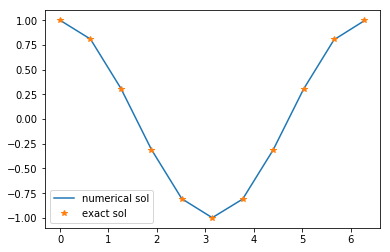

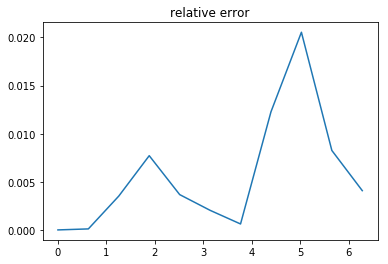

In [4]:
# 2c
steps = 10
y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
t = np.linspace(0,2*np.pi,steps+1)
y_numerical = rk_solve(sho_rhs, y0, t) # numerical solution

#x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y_exact = np.cos(t)

rel_err = []
for i in range(len(y_exact)):
    rel_err.append( abs((y_exact[i]-y_numerical[i,0]) / y_exact[i]))
print("relative error y(2*pi) = {}".format(rel_err[-1]))
    
plt.figure()
plt.plot(t,y_numerical[:,0])
plt.plot(t,y_exact,'*')
plt.legend(["numerical sol","exact sol"])
plt.show()



plt.figure()
plt.plot(t,rel_err)
plt.title("relative error")
plt.show()

2d) Repeat the RK4 numerical solution with stepsize `h = 1e-k` for `k in range(1,7)`. 

  i) Compute an array containing the value of the global relative error in $y(2 \pi)$ for each stepsize. Print out the arrays of step counts (or stepsizes), global relative errors, and runtimes.

In [5]:
#insert your code here
# 2d -i 
import time
rel_error = []
steps = []
timings = []
for i in range(1,7):
    cur = time.time()
    step = 10**i
    y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
    t = np.linspace(0,2*np.pi,step+1)
    y_numerical = rk_solve(sho_rhs, y0, t) # numerical solution
    y_exact = np.cos(t)
    end = time.time()
    
    timings.append(end-cur)
    steps.append(step)
    rel_error.append( abs((y_exact[-1]-y_numerical[-1,0]) / y_exact[-1]))
for i in range(len(steps)):
    steps[i] = 1.0/steps[i]

np.set_printoptions(precision=2) #set printed output to show 2 digits to right of decimal point
print("Steps:\n",  steps)
print("Relative errors:\n", rel_error)
print("Runtime:\n", timings)

Steps:
 [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]
Relative errors:
 [0.004080083785669819, 4.270765385783193e-08, 4.2799097599299785e-13, 3.3306690738754696e-16, 1.2212453270876722e-14, 5.995204332975845e-15]
Runtime:
 [0.0, 0.0019948482513427734, 0.018949270248413086, 0.27922892570495605, 1.6387221813201904, 15.948731184005737]


 ii) Plot the global relative error values as a function of stepsize in a way that enables you to quantify the order of the global error. 

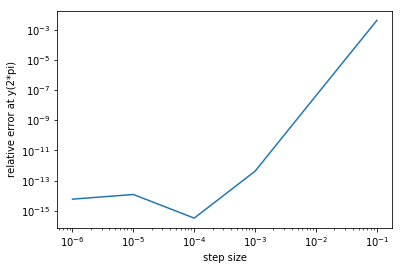

In [7]:
# 2d - ii
plt.plot(steps,rel_error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("step size")
plt.ylabel("relative error at y(2*pi)")
plt.show()

iii) State your order estimate and explain how you obtained it from your plot.

The slope estimate is (-15-(-3))/(-4-(-1)) ~ 4. So the accumulated error appears to be $\sim h^4$ which is same as expected for a method with local truncation error $\sim h^5$.

2e) For this part, use stepsize $h =  2 \pi / 20$. Run your simulation over a longer interval corresponding to a few hundred oscillator cycles. How long does it take for the numerical solution to reach a global absolute error of $0.1$. Has the magnitude of the oscillation changed significantly? If not, describe what occurs that causes the global absolute error to become large.

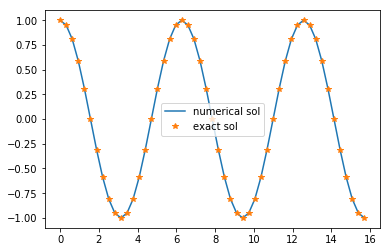

0


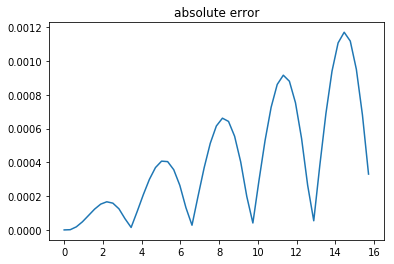

In [9]:
y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 

n = 5
steps = n*10
t = np.linspace(0, n*np.pi,steps+1)
y_numerical = rk_solve(sho_rhs, y0, t) # numerical solution
y_exact = np.cos(t)

plt.figure()
plt.plot(t,y_numerical[:,0])
plt.plot(t,y_exact,'*')
plt.legend(["numerical sol","exact sol"])
plt.show()



abs_errs = []
first_time_break = 0
for i in range(len(y_exact)):
    abs_err = abs(y_exact[i]-y_numerical[i,0])
    if abs_err>0.1 and first_time_break == 0:
        first_time_break = t[i]
    abs_errs.append( abs(y_exact[i]-y_numerical[i,0]))

print(first_time_break)
plt.figure()
plt.plot(t,abs_errs)
plt.title("absolute error")
plt.show()

## 2e Discussion
For me, the magnitude of oscillation hasn't changed significantly but the absolute error did increase along the time. I think is because of the error accumulation. Since every next prediction of step is based on previous step, if there are some error accumulated and not yet be removed, the error will be goes up.

# 3) Now consider the modified oscillator equation with a nonlinear damping term: $y'' - \epsilon (1-y^2) y' + y = 0$.

a) As $\epsilon \rightarrow 0$, this equation approaches the simple harmonic oscillator equation, so it might be reasonable to think that for a small value of $\epsilon$ the solution (again with initial conditions $y(0) = 1  , \; y'(0) = (0)$) would be indistinguishable from the one you computed in 2d. 

i) Test that hypothesis by computing a numerical solution for $\epsilon = .1$ over an interval $t \in [0, 20 \pi]$.

In [10]:
def vdp_rhs(y,t):
    """
    compute right-hand side function specifying rate of change
    
    Args:
        t: float value of independent variable
        y: numpy array of 3 floats storing value of dependent variable
        
    Returns:
        rate: numpy array of 2 float values for rate of change of y
    """
    rate = np.array([y[1],-y[0]+eps*(1-y[0]**2)*y[1]])
    return rate

In [12]:
# 3-i testing eps = 0.1
n = 20
steps = n*40
global eps
eps = 0.1
y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
t = np.linspace(0,n*np.pi,steps+1)
y_numerical = rk_solve(vdp_rhs, y0, t) # numerical solution

# 3-i comparing eps = 0
eps = 0
y_eps0 = rk_solve(vdp_rhs, y0, t) # numerical solution

ii) Plot your numerical solution, describe the result, and state your conclusion about the validity of the hypothesis.

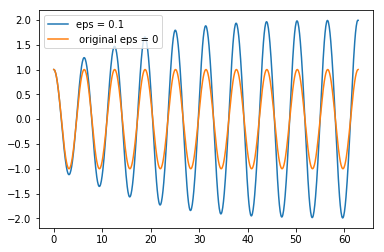

In [13]:
# 3-ii 
plt.figure()
plt.plot(t,y_numerical[:,0])
plt.plot(t,y_eps0[:,0])
plt.legend(['eps = 0.1',' original eps = 0'])
plt.show()

So the solution looks similar over the first half-cycle and both functions appear to oscillate at the same frequency, but the magnitude of oscillation grows until the amplitude stabilizes at 2. Thus, the hypothesis that incorporation of the small nonlinear damping term has an insignificant effect on the behavior is clearly not valid.

# 4) Reconsider the ODE from problem 3 in the alternative parameter range where $\epsilon >> 1$. 

a) Compute a numerical solution for $\epsilon = 10$ and plot it on a graph with the solution for $\epsilon = 10$. Again use a time interval of at least $20 \pi$. Discuss how you decided on your stepsize, and describe your plots.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


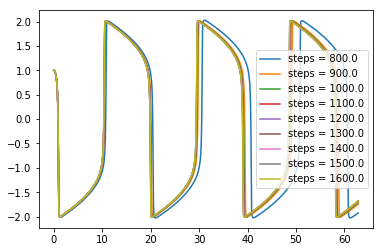

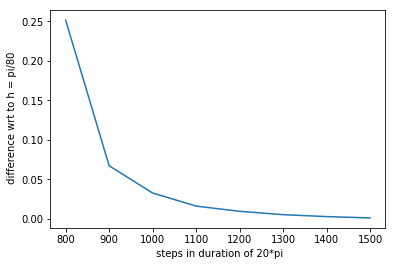

In [31]:
# 3-i testing eps = 0.1
steps = np.linspace(800,1600,9)
n = 20
global eps
eps = 10
plt.figure()
y_end = []
y_dif = []
for i in range(len(steps)):
    y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
    t = np.linspace(0,n*np.pi,steps[i]+1)
    y_numerical = rk_solve(vdp_rhs, y0, t) # numerical solution
    y_end.append(y_numerical[-1,0])
    plt.plot(t,y_numerical[:,0],label = 'steps = {}'.format(steps[i]))
plt.legend()
plt.show()

plt.figure()
for i in range(len(y_end)-1):
    y_dif.append(abs(y_end[i]-y_end[-1]))
steps = steps[:-1]
plt.plot(steps,y_dif)
plt.xlabel(" steps in duration of 20*pi")
plt.ylabel(" difference wrt to h = pi/80")
plt.show()

## 4-a) Discussion
I made my stepsize h = pi/40 to pi/80. And I compare those different stepsizes wrt the pi/80 and found that 1200 steps in a duration of 20*pi would be enough. 

b) What happens when $\epsilon$ becomes large? How should you set the stepsize for such a problem?

D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


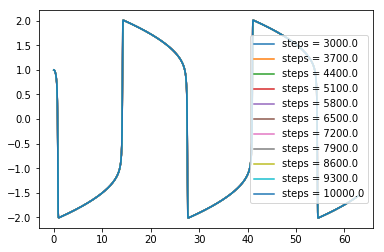

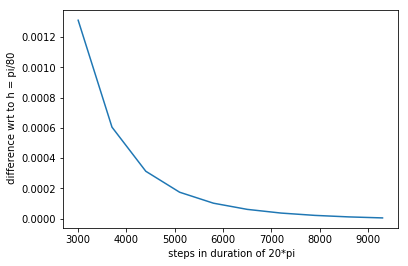

In [36]:
# 4b 
steps = np.linspace(3000,10000,11)
n = 20
global eps
eps = 15
plt.figure()
y_end = []
y_dif = []
for i in range(len(steps)):
    y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
    t = np.linspace(0,n*np.pi,steps[i]+1)
    y_numerical = rk_solve(vdp_rhs, y0, t) # numerical solution
    y_end.append(y_numerical[-1,0])
    plt.plot(t,y_numerical[:,0],label = 'steps = {}'.format(steps[i]))
plt.legend()
plt.show()

plt.figure()
for i in range(len(y_end)-1):
    y_dif.append(abs(y_end[i]-y_end[-1]))
steps = steps[:-1]
plt.plot(steps,y_dif)
plt.xlabel(" steps in duration of 20*pi")
plt.ylabel(" difference wrt to h = pi/80")
plt.show()

## 4-b) Discussion
After changed my epsilon = 15, I also increased the range of steps I need in the duration of 20*pi. After comparig the h = pi/500 as my referece, I found that h = pi/400 would be enough.

5a) Write your own python code to implement and Adams-Bashforth-Moulton predictor-corrector solver for systems of $1^{st}$-order ODEs. (You can implement the version in Eqs.(7.1.29) or find and implement a higher-order version.)

In [12]:
def pc_step(f,y_1,y,t0,t1):
    """
    compute next value for Adams-Bashforth-Moulton predictor-corrector ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y_1: numpy array of previous values of dependent variable
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    #insert your code here
    
    h = t1-t0
    #y_p = np.add(y, h/2.0*(3*f(y,t0) - f(y_1, t0-h)))
    #y_new = np.add(y, h/2.0*(f(y_p,t1) + f(y,t0)))
    y_p = y + h/2.0*(3*f(y,t0) - f(y_1, t0-h))
    y_new = y + h/2.0*(f(y_p,t1) + f(y,t0))
    return y_new

# pc_solve is a small modification of the rk_solve code discussed in class
def pc_solve(f,y0,t,order=4):
    """
    Second order Adams-Bashforth_Moulton predictor-corrector method for solving systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of current values of dependent variable
        t: numpy array of float values of independent variable
        order: int order of RK solver with allowed values [1,2,4]
        
    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    
    #insert your code here
    n = t.size
    m = y0.size #determine size of the dependent variable array
    y = [y0] #list to store 1D numpy array for each time
    for i in range(1):
        y_new = rk4_step(f,y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
        
    for i in range(1,n-1):
        y_new = pc_step(f,y[i-1],y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
    return np.array(y)

5b) Test your predictor-corrector code on the simple harmonic oscillator problem. Plot your solution, the exact solution, and the error.

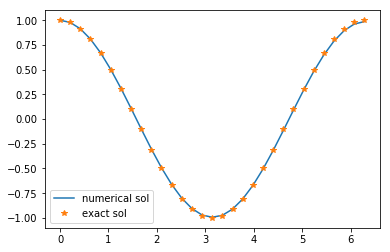

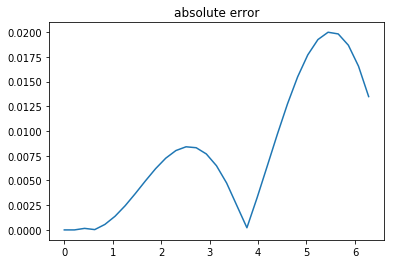

In [13]:
# 5b testing
steps = 30
y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
t = np.linspace(0,2*np.pi,steps+1)
y_numerical = pc_solve(sho_rhs, y0, t) # numerical solution

#x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y_exact = np.cos(t)

plt.figure()
plt.plot(t,y_numerical[:,0])
plt.plot(t,y_exact,'*')
plt.legend(["numerical sol","exact sol"])
plt.show()

abs_err = []
for i in range(len(y_exact)):
    abs_err.append( abs((y_exact[i]-y_numerical[i,0]) ))

plt.figure()
plt.plot(t,abs_err)
plt.title("absolute error")
plt.show()

5b) Is this method useful for dealing with the issues that arose in 4b? Plot the Runge-Kutta solution, the predictor-corrector solution, and the difference; then inspect and discuss your results. In particular, discuss the stepsizes required so that your numerical solution is no longer sensitive to stepsize.

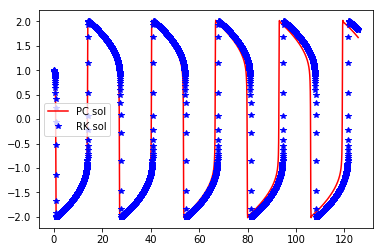

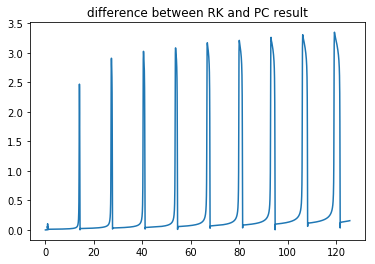

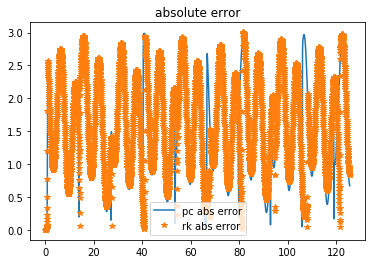

In [39]:
# 5b main
n=40
steps = 100*n
global eps
eps = 15
y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
t = np.linspace(0,n*np.pi,steps+1)
y_pc = pc_solve(vdp_rhs, y0, t) # numerical solution
y_rk = rk_solve(vdp_rhs, y0, t) # numerical solution
y_exact = np.cos(t)

plt.figure()
plt.plot(t,y_pc[:,0],'r-')
plt.plot(t,y_rk[:,0],'b*')
plt.legend(["PC sol","RK sol"])
plt.show()

diff = []
rk_err = []
pc_err = []
for i in range(len(y_exact)):
    diff.append( abs((y_pc[i,0]-y_rk[i,0]) ))
    rk_err.append( abs((y_exact[i]-y_rk[i,0]) ))
    pc_err.append( abs((y_exact[i]-y_pc[i,0]) ))
    
    
plt.figure()
plt.plot(t,diff)
plt.title("difference between RK and PC result")
plt.show()

plt.figure()
plt.plot(t,pc_err)
plt.plot(t,rk_err,'*')
plt.legend(["pc abs error","rk abs error"])
plt.title("absolute error")
plt.show()

## 5b) Discussion
After comapring Runge-Kutta and predictor-corrector solver on the Van der pol problem with eps = 15, I found when the stepsize 
h = pi/100, the result is bounded even when I increased the steps = 10000. But I found that Runge-Kutta solution usually has smaller error than that of predictor-corrector. And when the point is near the saddle-ponts which has larger rate of change that more errors will be produced.  

6) Explore the ODE solvers in python packages such as `scipy.integrate.odeint`. Do your best to use a package routine that computes a solution for the equation from 4b with minimal stepsize sensitivity. Present and briefly describe your results.

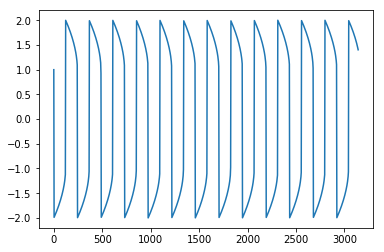

In [64]:
from scipy.integrate import odeint
n=1000
steps = 1*n
global eps
eps = 150
y0 = np.array([1,0]) # guess y[0] = 1, fixed y'[0] = 0 
t = np.linspace(0,n*np.pi,steps+1)
y_odeint = odeint(vdp_rhs, y0, t) # numerical solution

plt.figure()
plt.plot(t,y_odeint[:,0],'-')
plt.show()


## 6) Discussion
I chose the stepsize h = 1 when $t \in [0, 1000 \pi]$  which is the minimal stepsize I can give and the result is still pretty decent.